<a href="https://colab.research.google.com/github/divya-shree1125/Divya_metascifortechology/blob/main/Decision_tree_and_cross_vaildation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
df.shape

(344, 7)

In [5]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [8]:
x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [13]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True


In [10]:
y.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [16]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix


In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32,  1,  0],
       [ 0,  9,  0],
       [ 0,  0, 25]])

Text(70.72222222222221, 0.5, 'truth')

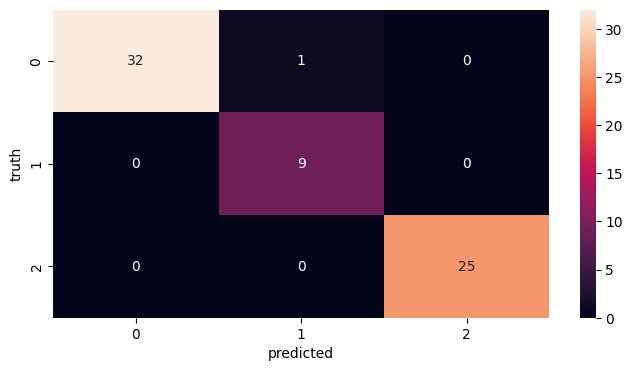

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        33
   Chinstrap       0.90      1.00      0.95         9
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        67
   macro avg       0.97      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [21]:
from sklearn.tree import plot_tree

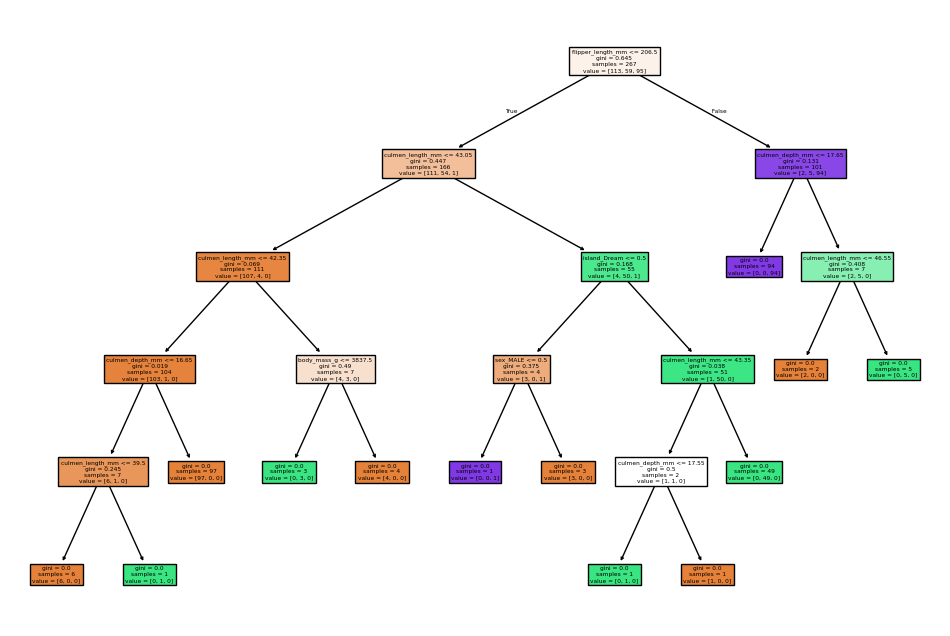

In [22]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=x.columns);